In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [22]:
df_raw = pd.read_csv("./Data/PhiladelphiaLandTemperatures.csv")
df_raw

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.072,1.740,Philadelphia,United States,39.38N,74.91W
1,1743-12-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
2,1744-01-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
3,1744-02-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
4,1744-03-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
...,...,...,...,...,...,...,...
3234,2013-05-01,16.638,0.184,Philadelphia,United States,39.38N,74.91W
3235,2013-06-01,22.213,0.236,Philadelphia,United States,39.38N,74.91W
3236,2013-07-01,25.683,0.233,Philadelphia,United States,39.38N,74.91W
3237,2013-08-01,22.477,0.381,Philadelphia,United States,39.38N,74.91W


In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3119 non-null   float64
 2   AverageTemperatureUncertainty  3119 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 177.3+ KB


## `load_data()`

In [40]:
def load_data(filepath):
    df = (pd.read_csv(filepath)
          .dropna() # Remove rows with missing values
          .iloc[1:, :] # First row has a temp. but skips the sequence; that far back not useful
          .reset_index(drop=True)
          .rename(columns={"dt": "date", 
                           "AverageTemperature": "avg_temp", 
                           "AverageTemperatureUncertainty": "avg_temp_uncertainty", # May be interesting to plot avg. temp +/- uncertainty
                           }
          )
    )
    
    df['date'] = pd.to_datetime(df['date'])

    cols_sel = ['date', 'avg_temp', 'avg_temp_uncertainty']
    
    return df.loc[:, cols_sel]

In [44]:
df = load_data("./Data/PhiladelphiaLandTemperatures.csv")
df

,date,avg_temp,avg_temp_uncertainty
0,1744-04-01,11.672,2.088
1,1744-05-01,16.907,1.586
2,1744-06-01,22.366,1.531
3,1744-07-01,23.642,1.371
4,1744-09-01,17.153,1.533
...,...,...,...
3113,2013-05-01,16.638,0.184
3114,2013-06-01,22.213,0.236
3115,2013-07-01,25.683,0.233
3116,2013-08-01,22.477,0.381


## `get_slice()`

In [46]:
def get_slice(df_inp, start_date, end_date):

    slice = df_inp[(df_inp["date"] >= start_date) & (df["date"] <= end_date)]

    return slice

In [54]:
df_slice = get_slice(df, "1980-01-01", "1982-12-31")
df_slice

,date,avg_temp,avg_temp_uncertainty
2713,1980-01-01,0.759,0.337
2714,1980-02-01,-0.678,0.442
2715,1980-03-01,4.608,0.337
2716,1980-04-01,11.776,0.287
2717,1980-05-01,17.719,0.323
2718,1980-06-01,20.301,0.214
2719,1980-07-01,24.782,0.463
2720,1980-08-01,24.976,0.347
2721,1980-09-01,21.434,0.321
2722,1980-10-01,12.609,0.237


## `train_test_split()`

In [63]:
def train_test_split(df_slice_inp, train_size):
    train = (df_slice_inp.iloc[:train_size, :]["avg_temp"]
             .to_numpy()
             .reshape(-1, 1)
             )
    test = (df_slice_inp.iloc[train_size:, :]["avg_temp"]
            .to_numpy()
            .reshape(-1, 1)
    )

    return train, test

In [64]:
X, y = train_test_split(df_slice, 24)
X.shape, y.shape

((24, 1), (12, 1))

In [67]:
X

array([[ 0.759],
       [-0.678],
       [ 4.608],
       [11.776],
       [17.719],
       [20.301],
       [24.782],
       [24.976],
       [21.434],
       [12.609],
       [ 6.665],
       [ 1.106],
       [-2.854],
       [ 3.606],
       [ 4.779],
       [12.519],
       [16.228],
       [22.059],
       [24.541],
       [22.446],
       [19.227],
       [11.901],
       [ 7.762],
       [ 1.743]])

# Train RNN

In [71]:
def make_RNN(X_inp, fcl_size, output_size):

    from Layers.InputLayer import InputLayer
    from Layers.FullyConnectedLayer import FullyConnectedLayer
    from Layers.TanhLayer import TanhLayer
    from Layers.LinearLayer import LinearLayer
    from LossFunctions.SquaredError import SquaredError

    IL = InputLayer(X_inp)
    FCLU = FullyConnectedLayer(X_inp.shape[1], fcl_size)
    ACT1 = TanhLayer()
    FCLW = FullyConnectedLayer(fcl_size, fcl_size,)
    FCLV = FullyConnectedLayer(fcl_size, output_size)
    ACT2 = LinearLayer()
    SE = SquaredError()

    model = {"IL": IL, "FCLU": FCLU, "ACT1": ACT1, "FCLW": FCLW, "FCLV": FCLV, "ACT2": ACT2, "SE": SE}

    return model

In [72]:
rnn = make_RNN(X_inp = X, fcl_size=10, output_size=y.shape[0])

In [75]:
rnn["FCLU"].getWeights()

array([[-8.80875510e-05,  3.50635915e-05, -5.30183083e-05,
        -7.92310351e-05, -8.42468250e-05, -9.89379613e-07,
        -5.02569371e-05,  7.50587060e-05,  6.11762044e-05,
         5.27987287e-05]])

In [81]:
rnn["FCLV"].getWeights().shape

(10, 12)

## `train_RNN_inplace()`

In [138]:
def train_RNN_inplace(model, X, y, learning_rate, epochs):

    training_dict = {"epoch": list(range(epochs)),
                     "squared_error": [],
                     "y_preds": [],}

    for epoch in range(epochs):
        # Forward
        for t in range(len(X)):
            IL_out = model["IL"].forward(X[t])
            if t > 0:
                FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
            else:
                FCLU_out = model["FCLU"].forward(IL_out)
            ACT1_out = model["ACT1"].forward(FCLU_out)
            FCLW_out = model["FCLW"].forward(ACT1_out)
            FCLV_out = model["FCLV"].forward(ACT1_out)
            ACT2_out = model["ACT2"].forward(FCLV_out)

        # Predictions and Loss
        # training_dict["y_preds"].append(ACT2_out.reshape(y.shape))
        training_dict["y_preds"].append(ACT2_out)

        error = model["SE"].eval(y, ACT2_out.reshape(y.shape))
        training_dict["squared_error"].append(error)

        # Backward
        dhNext_dW = np.zeros((1, model["FCLV"].getWeights().shape[0])) # Same shape as what FCLV.backward(grad) is...
        
        for t in range(len(X)-1, -1, -1):
            grad = model["SE"].gradient(y, model["ACT2"].getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
            grad = model["ACT2"].backward(grad, t_inp=t)

            model["FCLV"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLV"].updateBiasesGradAccum(grad)

            grad = model["FCLV"].backward(grad) + dhNext_dW
            # if t == len(X)-1:
                # print(f"FCLV gradient shape is: {grad.shape}") # Verify gradient shape
            grad = model["ACT1"].backward(grad, t_inp=t)

            if t > 0:
                model["FCLW"].updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
                model["FCLW"].updateBiasesGradAccum(grad)

            model["FCLU"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLU"].updateBiasesGradAccum(grad)

            dhNext_dW = model["FCLW"].backward(grad)

        # Update weights   
        model["FCLU"].updateWeights(grad, eta=learning_rate)
        model["FCLV"].updateWeights(grad, eta=learning_rate)
        model["FCLW"].updateWeights(grad, eta=learning_rate)

    return pd.DataFrame(training_dict)

In [150]:
lr = 0.0001
rnn = make_RNN(X_inp = X, fcl_size=20, output_size=y.shape[0]) # Have to reinitialize
training_results = train_RNN_inplace(rnn, X, y, learning_rate=lr, epochs=60)
training_results

,epoch,squared_error,y_preds
0,0,214.108552,"[[1.5685335210957597e-05, -9.053965016522229e-..."
1,1,212.058043,"[[-0.01556518933948407, 0.00942829375098456, 0..."
2,2,207.996346,"[[-0.04665215143485994, 0.028420270223073092, ..."
3,3,202.001353,"[[-0.09309598728355166, 0.05679422957387576, 0..."
4,4,194.188029,"[[-0.15467377659367731, 0.09441398152890876, 0..."
5,5,184.706206,"[[-0.2310899674188528, 0.14109896252046158, 0...."
6,6,173.737714,"[[-0.32197780070337667, 0.19662510605968014, 0..."
7,7,161.492889,"[[-0.4269010770094898, 0.26072592217328167, 0...."
8,8,148.206541,"[[-0.545356256313462, 0.33309378033521125, 0.9..."
9,9,134.133453,"[[-0.6767748801171563, 0.4133813893212287, 1.1..."


## Plot errors
* NOTE: Epoch with 0 error will be overfit - stop earlier than that

<AxesSubplot: xlabel='epoch'>

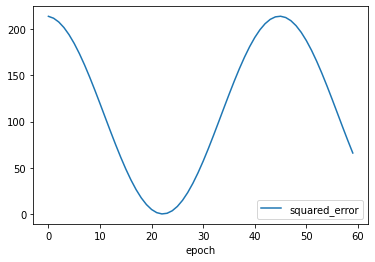

In [148]:
training_results.plot(x="epoch", y="squared_error")

In [149]:

y_preds_graph

array([array([[ 4.58764621e-05, -5.12755014e-05, -6.78088246e-05,
                4.27681644e-05, -8.86781095e-05,  5.60213242e-05,
               -2.74876795e-05, -5.17307308e-05, -2.25066606e-05,
                7.86135978e-06,  5.28783573e-07,  2.14048525e-05]]),
       array([[-0.97589721,  0.59616551,  1.66077755,  2.90857838,  5.1997872 ,
                5.98790662,  7.23587367,  6.60718401,  5.73981194,  4.04593581,
                2.89862705,  1.76065784]])                                     ,
       array([[-3.20829632,  1.95997106,  5.45984844,  9.56165903, 17.09414887,
               19.68470089, 23.78750619, 21.72078357, 18.8692947 , 13.30071879,
                9.52903722,  5.7879957 ]])                                     ],
      dtype=object)

## Plot Predictions
* TODO: Make a function for plotting, give a gradient of colors from Red to Purple


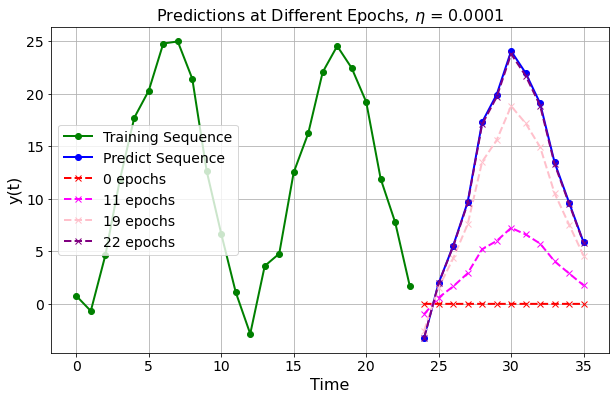

In [154]:
graph_index_lst = [0, 11, 19, 22]
colors = ["red", "magenta", "purple"]
y_preds_graph = training_results["y_preds"].loc[graph_index_lst].to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
t_vals_x = np.arange(len(X))
t_vals_y = np.arange(len(X), len(X)+len(y))

ax.plot(t_vals_x, X.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
ax.plot(t_vals_y, y.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")

colors = ["red", "magenta", "pink", "purple"]
for ind, y_pred_seq, color in zip(graph_index_lst, y_preds_graph, colors):
    ax.plot(t_vals_y, y_pred_seq.flatten(), color = color, linestyle="dashed", label=f"{ind} epochs", linewidth=2, marker="x")


ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("y(t)", fontsize=16)
ax.set_title(f"Predictions at Different Epochs, $\eta$ = {lr}", 
             fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(fontsize=14)
ax.grid()
plt.show()

# TODO:
* Test trained model on different year
* Figure out why the error is cyclical? Look at how the weights or gradients change overtime...
* Calculate RMSE - add that as a calculation to the training dict
* Make functions for plotting
    * Plot temp +/- uncertainty
* Put date/time on the axis instead of relative time
* Test different activation function (ReLU)